# Milestone 3 Assignment - Capstone Project

## Author - Studentname

<div id="reminder" style="border-radius: 5px; background-color:ghostwhite; padding: 5px 5px; color: darkslategray; " >
Remove this cell before submitting this file.</div>
### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>



## <font color="blue">Problem and Key Insight</font>

### Problem & Background


In this Capstone project is dedicated to prediction of president elections results. We are going to see if unemployment rate, average income, poverty level, expenses for education and other social-economics parameters affect the results of federal elections by state. And if they affect, we need to understand how exactly it happens.

Then using classification machine learning techniques we will try to predict who will win (Republicans or Democrats) the upcoming president elections in each state.

To solve this problem it's necessary to get following data:

Elections results by state/year;
Employment/unemployment data by state/year;
Data about poverty level by state/year;
Average income by state/year;
Data about education expenses by state/year;
etc.
All datasets have "State" and "Year", those columns are keys for joining datasets.



### Conclusions

1.  In this capstone were built Decision Tree, Random Forest, Naive Bayes and SVM Classification models.
2. Were noticed that it's possible to get pretty good predictions of elections results based on known social-economic data.
3. The best results shows Naive Bayes Classifier with all chosen set of features.
4. In general, the best results were gotten using Random Forest and SVM Classification models.

### Next Steps

1. Find better set of features.
2. Find better set of hyperparameters.

## <font color="blue">Data Exploration and Preparation</font>

### Sources


### 1. Employment / unemployment data ###
#### Dataset sourse: https://data.bls.gov/PDQWeb/la

It's a WEB-tool that allows to get data from Bureau of Labor Statistics about employment/unemployment data by year, area (state, county, city, etc.).

I retrieved data by state for all available years (since 1976). Because data are available in XLS-files, separate file for each state, I had to combine all these data in one CSV-file, presented below. 

Also I've left annual data only, because data are available by month too.
Dataset contains columns "State" and "Year" that will be used as keys for joinoing with other datasets.

### 2. Poverty and income estimates data ###
#### Dataset source: https://www.census.gov/data-tools/demo/saipe/saipe.html?s_appName=saipe&menu=grid_proxy&s_USStOnly=y&map_yearSelector=2016&map_geoSelector=aa_c&s_measures=aa_snc

It's a WEB-tool from United States Census Bureau that provides poverty rate data by year, area (state and county) and age. I've downloaded data by state, for all age categories and for all available years (since 1989). Dataset is available in CSV and PDF formats.

Dataset contains columns "State" and "Year" that will be used as keys for joinoing with other datasets.

### 3. Presidential Election Data
#### Source: https://uselectionatlas.org/RESULTS/

Dataset was combined based on data presented on the site.

Dataset contains columns "State" and "Year" that will be used as keys for joinoing with other datasets.

So, finally we use three combined datasets.

* political_data.csv - main dataset, that contains election statistics and election results;

* state_edu_spending.csv - statistics about expenses for education;

* socio_data.csv - unemployment data, average income and poverty data.

In [217]:
#Import libraries
import pandas as pd
import numpy as np
import re
import pandas_profiling
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
import category_encoders as ce
import os
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report

In [24]:
#Load political data
political_df = pd.read_csv("political_data.csv")

In [25]:
political_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 28 columns):
Unnamed: 0     535 non-null int64
year           535 non-null int64
state          535 non-null object
ev_r           535 non-null int64
ev_d           535 non-null int64
population     535 non-null float64
total_vap      535 non-null float64
total_reg      535 non-null float64
total_vote     535 non-null int64
perc_vap       535 non-null float64
perc_reg       535 non-null float64
d_placed       535 non-null int64
r_placed       535 non-null int64
perc_margin    535 non-null float64
vote_perc_d    535 non-null float64
vote_perc_r    535 non-null float64
vote_perc_t    535 non-null float64
vote_perc_o    535 non-null float64
electoral      535 non-null object
governor       535 non-null object
con_house_d    535 non-null int64
con_house_r    535 non-null int64
con_sen_d      535 non-null int64
con_sen_r      535 non-null int64
leg_house_d    535 non-null int64
leg_house_r    535 non

Dataset contains of 535 rows and 28 columns.

Columns:

* Year;           
* State ;          
* EV_R  - Electoral votes Republican;
* EV_D  - Electoral votes Democrat;        
* Population - Population of the state;     
* Total_VAP - Total vote age population;    
* Total_VAC  - Voting Age Citizens;     
* Total_REG - Total registered voters;       
* Total_Vote - Total voted;  
* Perc_VAP -  Voter Turnout (Vote for President as a % Voting Age Population);
* Perc_VAC -  Voter Turnout (Vote for President as a % Voting Age Citizens);      
* Perc_reg    - percentage of the state's population that are registered voters;    
* D_placed, R_placed, O_placed   - what place the candidate came in the election, 1 is the winner; 
* Margin - difference between first and second place;         
* Perc_Margin - percentage difference in votes betweeen first and second place;  
* Vote_Perc_D, Vote_Perc_R, Vote_Perc_T, Vote_Perc_O  - amount of votes the candidate recieved in the state;   
* Vote_D, Vote_R, Vote_T, Vote_O - amount of votes the candidate recieved in the state.

In [26]:
#Most of columns are results of elections, so they will cause overfitting and could be dropped
political_df = political_df[['year', 'state', 'population', 'total_vap', 'perc_vap', 'perc_reg', 'ev_r', 'ev_d']]

In [27]:
#Change state value for matching with other datasets
political_df.loc[political_df['state']=='d.c.', 'state'] = 'district of columbia'

In [28]:
#Load education data
education_df = pd.read_csv("state_edu_spending.csv")

In [29]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 7 columns):
year                   946 non-null int64
state                  946 non-null object
total_revenue          946 non-null float64
instruction_expense    946 non-null float64
property_expense       946 non-null float64
total_edu_expense      946 non-null float64
per_pupil_expense      946 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 51.8+ KB


* year -  year the survey was done;
* state -    name of the state;
* total_revenue - total revenues from all sources;
* instruction_expense - instructional expenditures subtotal;
* property_expense -  Public elementary and secondary education expenditure on property;
* total_edu_expense - total expenditures for education;
* per_pupil_expense -  per pupil expenditures.

In [30]:
#Transform 'state' values to low register
education_df['state'] = education_df['state'].str.lower()

In [31]:
#Load socioeconomic data
socio_df = pd.read_csv("socio_data.csv")

In [32]:
socio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 18 columns):
Unnamed: 0                                         2184 non-null int64
state                                              2184 non-null object
year                                               2184 non-null int64
labor force                                        2184 non-null int64
unemployment rate                                  2184 non-null float64
All Ages SAIPE Poverty Universe                    2142 non-null float64
All Ages in Poverty Count                          2142 non-null float64
All Ages in Poverty Percent                        2142 non-null float64
Under Age 18 SAIPE Poverty Universe                2142 non-null float64
Under Age 18 in Poverty Count                      2142 non-null float64
Under Age 18 in Poverty Percent                    2142 non-null float64
Ages 5 to 17 in Families SAIPE Poverty Universe    2142 non-null float64
Ages 5 to 17 in Families

Dataset contains 2184 rows and 18 columns. Columns:

* state;

* year;

* labor force - total amount of people, able to work in current state in current year (unemployment+employment);

* unemployment rate - unemployment/labor force;
* All Ages SAIPE Poverty Universe - all amount of people included to survey results                                          
* All Ages in Poverty Count  - amount of people all ages in poverty                                             
* All Ages in Poverty Percent                                                              
* Under Age 18 SAIPE Poverty Universe                                      
* Under Age 18 in Poverty Count                                                               
* Under Age 18 in Poverty Percent                                                 
* Ages 5 to 17 in Families SAIPE Poverty Universe                          
* Ages 5 to 17 in Families in Poverty Count                                      
* Ages 5 to 17 in Families in Poverty Percent                              
* Under Age 5 SAIPE Poverty Universe                                      
* Under Age 5 in Poverty Count                                                            
* Under Age 5 in Poverty Percent                                                  
* Median Household Income in Dollars                                      


In [33]:
#Transform 'state' values to low register
socio_df['state'] = socio_df['state'].str.lower()

In [34]:
#Join datasets 
politic_socio = pd.merge(political_df, socio_df, how='left', on=['state', 'year'])
politic_socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 534
Data columns (total 24 columns):
year                                               535 non-null int64
state                                              535 non-null object
population                                         535 non-null float64
total_vap                                          535 non-null float64
perc_vap                                           535 non-null float64
perc_reg                                           535 non-null float64
ev_r                                               535 non-null int64
ev_d                                               535 non-null int64
Unnamed: 0                                         535 non-null int64
labor force                                        535 non-null int64
unemployment rate                                  535 non-null float64
All Ages SAIPE Poverty Universe                    535 non-null float64
All Ages in Poverty Count                 

In [35]:
#Join datasets 
data_df = pd.merge(politic_socio, education_df, how='left', on=['state', 'year'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 534
Data columns (total 29 columns):
year                                               535 non-null int64
state                                              535 non-null object
population                                         535 non-null float64
total_vap                                          535 non-null float64
perc_vap                                           535 non-null float64
perc_reg                                           535 non-null float64
ev_r                                               535 non-null int64
ev_d                                               535 non-null int64
Unnamed: 0                                         535 non-null int64
labor force                                        535 non-null int64
unemployment rate                                  535 non-null float64
All Ages SAIPE Poverty Universe                    535 non-null float64
All Ages in Poverty Count                 

In [36]:
#Drop rows with null values
df = data_df.dropna()

In [37]:
df.isnull().sum()

year                                               0
state                                              0
population                                         0
total_vap                                          0
perc_vap                                           0
perc_reg                                           0
ev_r                                               0
ev_d                                               0
Unnamed: 0                                         0
labor force                                        0
unemployment rate                                  0
All Ages SAIPE Poverty Universe                    0
All Ages in Poverty Count                          0
All Ages in Poverty Percent                        0
Under Age 18 SAIPE Poverty Universe                0
Under Age 18 in Poverty Count                      0
Under Age 18 in Poverty Percent                    0
Ages 5 to 17 in Families SAIPE Poverty Universe    0
Ages 5 to 17 in Families in Poverty Count     

In [38]:
#Add target variable - winner. 1 for Republican and 0 for Democrat
df.loc[df['ev_r'] >= df['ev_d'], 'winner'] = 1
df.loc[df['ev_r'] < df['ev_d'], 'winner'] = 0

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
df = df.drop(['ev_r', 'ev_d'], axis = 1)

In [41]:
df = df.drop(['Unnamed: 0'], axis = 1)

### Data Exploration Summary


In [42]:
#Dataset profile that also provides correlation matrix
pandas_profiling.ProfileReport(df)

Number of variables,27
Number of observations,281
Total Missing (%),0.0%
Total size in memory,61.5 KiB
Average record size in memory,224.0 B
Numeric,9
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,16


According correlation analysis, following variables are highly correlated with others and should be rejected:
* Ages 5 to 17 in Families SAIPE Poverty Universe;
* Ages 5 to 17 in Families in Poverty Count;
* Ages 5 to 17 in Families in Poverty Percent;
* All Ages SAIPE Poverty Universe;
* All Ages in Poverty Count;
* Under Age 18 SAIPE Poverty Universe;
* Under Age 18 in Poverty Count;
* Under Age 18 in Poverty Percent;
* Under Age 5 SAIPE Poverty Universe;
* Under Age 5 in Poverty Count;
* Under Age 5 in Poverty Percent;
* instruction_expense;
* labor force;
* total_edu_expense;
* total_revenue;
* total_vap.

In [218]:
winner_by_state = pd.crosstab(df['state'],df['winner']) #pivot-table containing quantity of winner party by state

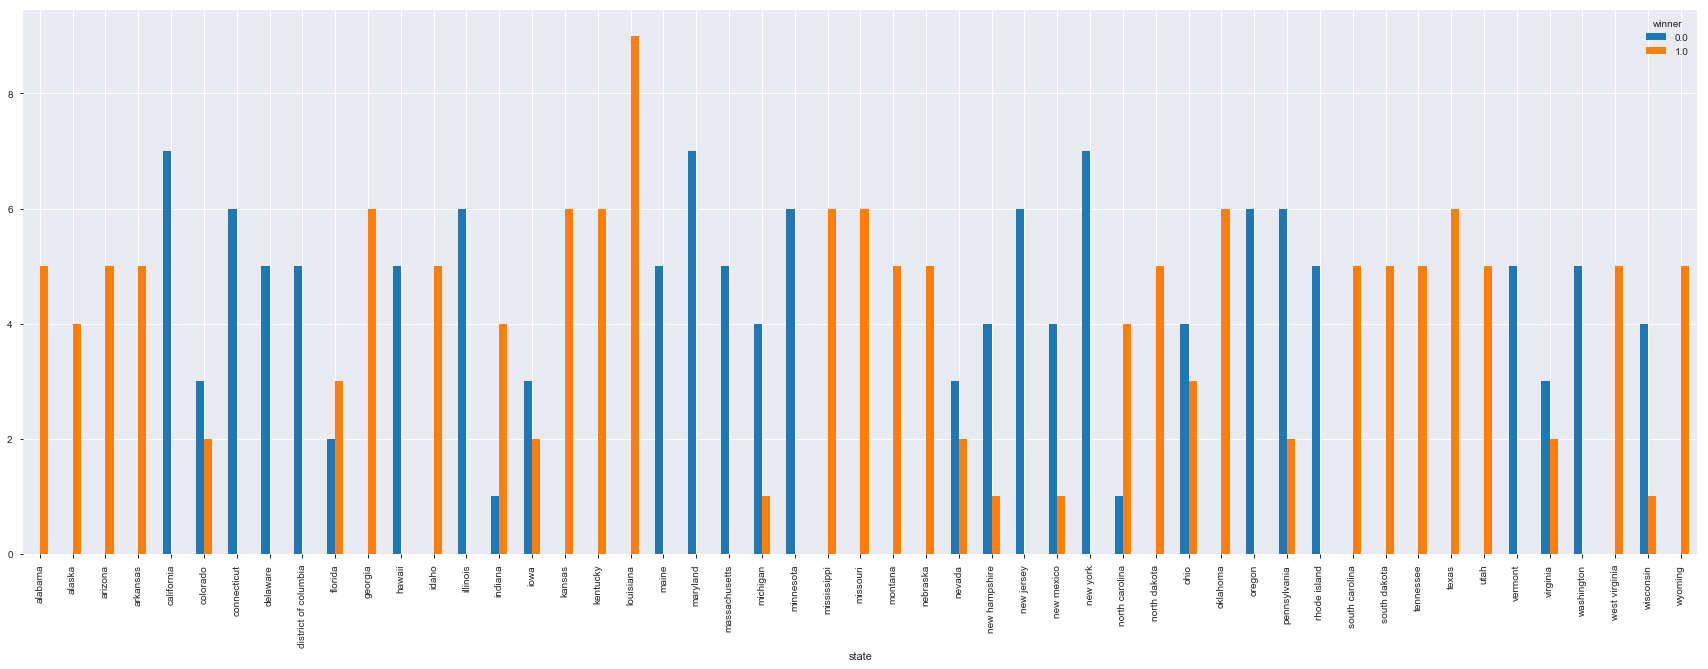

In [221]:
ax = plt.figure(figsize=(30, 10)).gca()
winner_by_state.plot.bar(ax=ax)
plt.show()

1 - Winner - Republican
0 - Winner - Democrat

States where Republicans only won:
* Alamaba;
* Alaska;
* Arizona;
* Arkanzas;
* Georgia;
* Idaho;
* Kansas;
* Kentucky;
* Loisiana;
* Mississipi;
* Missouri;
* Nebraska;
* North Dakota;
* Oklahoma;
* South Carolina;
* Tennessee;
* Texas;
* Utah;
* West Virginia;
* Wyoming. 

States where Democrats only won:
* California;
* Connecticut;
* Delaware;
* District of Columbia;
* Hawaii;
* Illinois;
* Maine;
* Maryland;
* Massachusets;
* Minnesota;
* New Jersey;
* New York;
* Oregon;
* Rhode Island;
* Vermont;
* Washington. 

States where won both parties in different years:
* Colorado;
* Florida;
* Indiana;
* Iowa;
* Michigan;
* Nevada;
* New Hampshire;
* New Mexico;
* North Carolina;
* Ohio;
* Pennsilvania;
* Virginia;
* Wisconsin.

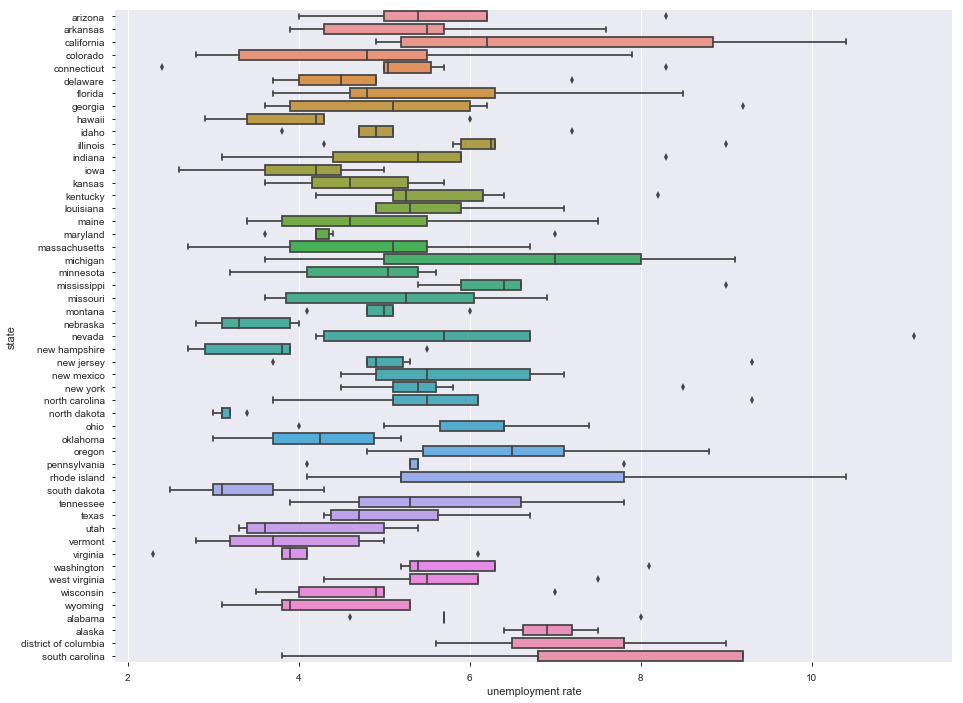

In [223]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'unemployment rate', y = 'state', data = df)

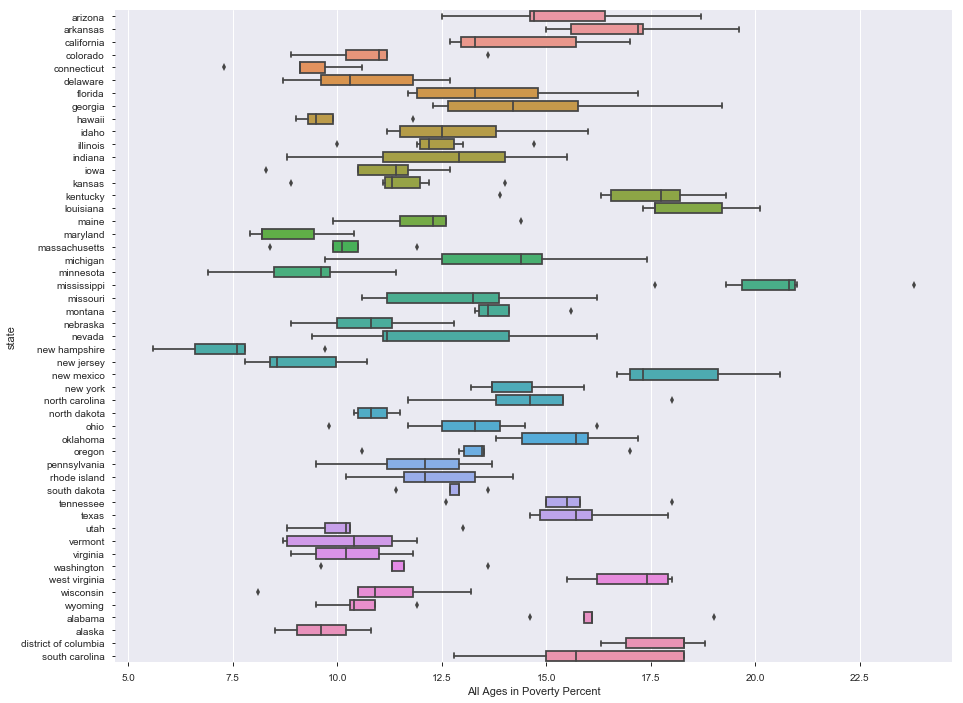

In [226]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'All Ages in Poverty Percent', y = 'state', data = df)

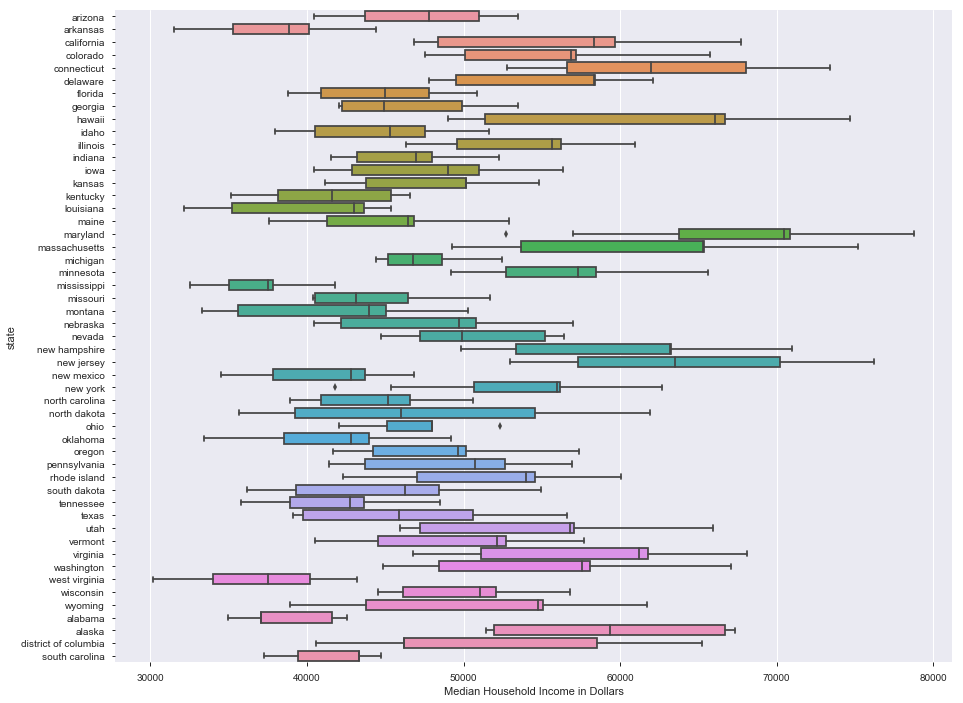

In [227]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'Median Household Income in Dollars', y = 'state', data = df)

In [43]:
columns_not_rejected = ['All Ages in Poverty Percent', 'Median Household Income in Dollars', 'per_pupil_expense', 'perc_reg', 'perc_vap', 'population', 'property_expense', 'state', 'unemployment rate', 'year', 'winner' ]

In [47]:
df = df[columns_not_rejected]

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 11 columns):
All Ages in Poverty Percent           281 non-null float64
Median Household Income in Dollars    281 non-null float64
per_pupil_expense                     281 non-null float64
perc_reg                              281 non-null float64
perc_vap                              281 non-null float64
population                            281 non-null float64
property_expense                      281 non-null float64
state                                 281 non-null object
unemployment rate                     281 non-null float64
year                                  281 non-null object
winner                                281 non-null float64
dtypes: float64(9), object(2)
memory usage: 36.3+ KB


Final dataset consists of 281 entries and 11 columns.
Columns are:
* All Ages in Poverty Percent;
* Median Household Income in Dollars;
* per_pupil_expense;                    
* perc_reg;                              
* perc_vap;                             
* population;                           
* property_expense;                     
* state;                                
* unemployment rate;                     
* year;                               
* winner. 

## <font color="blue">Feature Engineering and Selection</font>

### Encoding categorical variables with risk values ###

In [49]:
df['year'] = df['year'].astype(str)

In [50]:
#Getting risk values
General_Prob = (df['winner'] == 1 ).sum()/float(df.shape[0])
variable_risks = {}
for variable in ['state', 'year', 'electoral', 'governor']:
    tab = pd.crosstab(df[variable], df.winner)
    print(tab)
    num_levels = tab.shape[0]
    level_risk = {}
    levels = list(tab.index)
    level_index = 0
    for lev in levels:
        if lev == True:
            lev = 'True'
        elif lev == False:
            lev = 'False'
        level_risk[lev] = np.log((tab.iloc[level_index, 1] + General_Prob) / (tab.iloc[level_index, 0] + 1 - General_Prob))
        level_index += 1
    variable_risks[variable] = level_risk

# list the risks associated with the variables
variable_risks

winner                0.0  1.0
state                         
alabama                 0    5
alaska                  0    4
arizona                 0    5
arkansas                0    5
california              7    0
colorado                3    2
connecticut             6    0
delaware                5    0
district of columbia    5    0
florida                 2    3
georgia                 0    6
hawaii                  5    0
idaho                   0    5
illinois                6    0
indiana                 1    4
iowa                    3    2
kansas                  0    6
kentucky                0    6
louisiana               0    9
maine                   5    0
maryland                7    0
massachusetts           5    0
michigan                4    1
minnesota               6    0
mississippi             0    6
missouri                0    6
montana                 0    5
nebraska                0    5
nevada                  3    2
new hampshire           4    1
new jers

KeyError: 'electoral'

In [51]:
#Replace categorical variables with risk values
df_risks = df.copy()
num_obs = df.shape[0]
for variable in ['state', 'year']:
    for i in range(num_obs):
        if df[variable][i] == True:
            lev = 'True'
        elif df[variable][i] == False:
            lev = 'False'
        else:
            lev = df[variable][i]
        df_risks[variable][i] = variable_risks[variable][lev]
df_risks.head()

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,All Ages in Poverty Percent,Median Household Income in Dollars,per_pupil_expense,perc_reg,perc_vap,population,property_expense,state,unemployment rate,year,winner
0,16.4,53481.0,7613.006435,63.7,47.136364,6931071.0,3.731450e+08,2.45759,5.4,0.366173,1.0
1,17.2,44406.0,9845.568548,64.2,50.254545,2988248.0,2.255353e+08,2.45759,3.9,0.366173,1.0
2,14.4,67715.0,11495.330166,73.3,50.263636,39250017.0,7.354426e+08,-2.65248,5.5,0.366173,0.0
3,11.0,65718.0,9574.742414,72.4,58.781818,5540545.0,2.500031e+08,-0.318198,3.3,0.366173,0.0
4,9.9,73380.0,18957.841335,69.8,61.490909,3576452.0,1.995604e+08,-2.50883,5.1,0.366173,0.0


In [52]:
df_risks.columns

Index(['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_reg', 'perc_vap', 'population',
       'property_expense', 'state', 'unemployment rate', 'year', 'winner'],
      dtype='object')

### Z-Normalization numerical variables ###

In [53]:
#Perform z-score normalization of columns
columns = ['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_reg', 'perc_vap', 'population',
       'property_expense', 'state', 'unemployment rate']

for column in columns:
    df_risks[column] = pd.DataFrame(preprocessing.scale(df_risks[column]))


C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [55]:
#X - matrix of features, Y - target variable 
X = df_risks.iloc[:, 0:-1]
Y = df_risks.iloc[:, -1]

### Feature selection ###

In this assignment I'll try several methods for feature selection:
* Recursive feature elimination;
* Forward Stepwise Feature Selection;
* K-Best feature selection;
* Elastic Net.

#### Recursive feature elimination ###

In [83]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, 5, step=1) # keep five and remove variables one at a time (step) 
selector = selector.fit(X, Y)        # fit the model with the five kept features
print(selector.support_)             # show which are kept (True) and which are removed (False)
print(selector.ranking_)             # show in what order they were removed highest removed first
print(X.columns)

f = open("features.csv",'w')
f.writelines("%s\n" % column for column in X.columns)
f.close()

rfe_set = X.columns[selector.support_].values
rfe_set

[False False  True  True  True False False  True False  True]
[5 6 1 1 1 3 4 1 2 1]
Index(['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_reg', 'perc_vap', 'population',
       'property_expense', 'state', 'unemployment rate', 'year'],
      dtype='object')


array(['per_pupil_expense', 'perc_reg', 'perc_vap', 'state', 'year'], dtype=object)

5 features that were chosen with Recursive feature elimination method: 'per_pupil_expense', 'perc_reg', 'perc_vap', 'state', 'year'.

#### Forward Stepwise Feature Selection ####

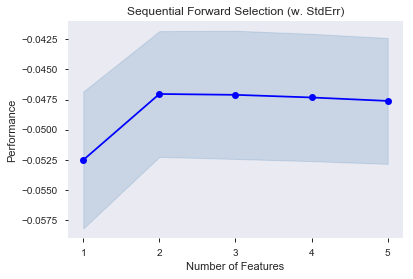

{1: {'feature_idx': (7,),
  'cv_scores': array([-0.05527049, -0.08620774, -0.03903103, -0.03832966, -0.03871653,
         -0.06024279, -0.03831357, -0.06994155, -0.03210994, -0.06709797]),
  'avg_score': -0.052526126029351784,
  'feature_names': ('state',)},
 2: {'feature_idx': (7, 9),
  'cv_scores': array([-0.05453655, -0.07822193, -0.03507696, -0.0320192 , -0.03221818,
         -0.04324851, -0.03443256, -0.06534957, -0.03482169, -0.06047634]),
  'avg_score': -0.047040151331765,
  'feature_names': ('state', 'year')},
 3: {'feature_idx': (7, 8, 9),
  'cv_scores': array([-0.05488444, -0.07950521, -0.03485251, -0.03213094, -0.0314721 ,
         -0.04339384, -0.03402391, -0.0655466 , -0.03542437, -0.05988146]),
  'avg_score': -0.047111538276546044,
  'feature_names': ('state', 'unemployment rate', 'year')},
 4: {'feature_idx': (3, 7, 8, 9),
  'cv_scores': array([-0.05507754, -0.07928727, -0.03546625, -0.03375961, -0.03131709,
         -0.04313609, -0.03391957, -0.06572065, -0.03516904, -0

In [233]:
# Forward Stepwise Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LinearRegression()

sfs = SFS(lr, 
          k_features= 5,
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
sfs.subsets_
#plt.title('Sequential Forward Selection (w. StdErr)')
#plt.grid()
#plt.show()

In [93]:
sfs_set = ['perc_reg','population','state','unemployment rate','year']

5 features that were chosen with Forward Stepwise Feature Selection method: 'perc_reg','population','state','unemployment rate','year'.

#### LASSO ####

In [70]:
from sklearn import linear_model

alpha = .01 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, Y)

print(X.columns)
print(clf.coef_)
print(clf.intercept_)
print("Sum of ABS of coefficients = %.2f"%np.sum(clf.coef_**2)) 

Index(['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_reg', 'perc_vap', 'population',
       'property_expense', 'state', 'unemployment rate', 'year'],
      dtype='object')
[-0.         -0.         -0.          0.         -0.01423006  0.          0.
  0.43031642 -0.02052842  0.07905083]
0.518152464084
Sum of ABS of coefficients = 0.19


#### K-best ####

In [80]:
# Perform feature selection
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=5)
select.fit(X, Y)
select.get_support()
kbest_set = X.columns[select.get_support()].values
kbest_set

array(['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_vap', 'state'], dtype=object)

5 features that were chosen with K-best feature selection method: 'All Ages in Poverty Percent', 'Median Household Income in Dollars', 'per_pupil_expense', 'perc_vap', 'state'.

#### Elastic Net ###

In [78]:
# ElasticNet
from sklearn.linear_model import ElasticNet
alpha = .05
clf = linear_model.ElasticNet(alpha=alpha)
elastic_model = clf.fit(X, Y)

print(clf.coef_)
print(clf.intercept_)
lasso_fs = clf.fit(X, Y)
mask = elastic_model.coef_ != 0

elastic_set =  X.columns[mask]
elastic_set

[ 0.         -0.00183471 -0.         -0.         -0.00875159 -0.         -0.
  0.40602053 -0.01666701  0.        ]
0.526690391459


Index(['Median Household Income in Dollars', 'perc_vap', 'state',
       'unemployment rate'],
      dtype='object')

Features that were chosen with Elastic Net method:'Median Household Income in Dollars', 'perc_vap', 'state', 'unemployment rate'.

So, I have several sets of features (all features and features chosen using different methods). I'll run models with all those sets of features.

In [238]:
print("SFS set of features: ", sfs_set, '\n')
print("RFE set of features: ", rfe_set, '\n')
print("K-Best set of features: ", kbest_set, '\n')
print("Elastic set of features: ", elastic_set, '\n')

SFS set of features:  ['perc_reg', 'population', 'state', 'unemployment rate', 'year'] 

RFE set of features:  ['per_pupil_expense' 'perc_reg' 'perc_vap' 'state' 'year'] 

K-Best set of features:  ['All Ages in Poverty Percent' 'Median Household Income in Dollars'
 'per_pupil_expense' 'perc_vap' 'state'] 

Elastic set of features:  Index(['Median Household Income in Dollars', 'perc_vap', 'state',
       'unemployment rate'],
      dtype='object') 



In [239]:
df_risks.columns

Index(['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_reg', 'perc_vap', 'population',
       'property_expense', 'state', 'unemployment rate', 'year', 'winner'],
      dtype='object')

All sets, getting by different feature selection methods are not identical.
Feature 'property_expense' is the only feature that no one set uses.

## <font color="blue">Data Models</font>

Problem of prediction elections results is definitely classification problem, so I'll run classification models.
I'll try several methods that perform well on classification tasks:
* Decision Tree;
* Random Forest;
* Naive Bayes;
* SVM Classification.

The important point is that our main dataset is small, so probably SVM Classifier will work well.

* Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller subsets. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches and a leaf node represents a classification or decision. 

* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees’ habit of over fitting to their training set.

* Naive Bayes Classifier
It is a classification technique based on Bayes’ Theorem with an assumption of independence among features. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability. 

* A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes.

### Preparation train and test sets ###

#### With all selected features ###

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

#### With RFE set of features

In [86]:
X_rfe = X[rfe_set]
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, Y, test_size = 0.2, random_state=1)

In [90]:
X_rfe.head()

,per_pupil_expense,perc_reg,perc_vap,state,year
0,-1.172322,-0.757640,-1.350135,1.019426,0.366173
1,-0.468862,-0.694158,-0.917286,1.019426,0.366173
2,0.050962,0.461217,-0.916024,-1.292183,0.366173
3,-0.554197,0.346949,0.266423,-0.236239,0.366173
4,2.402331,0.016842,0.642485,-1.227200,0.366173


#### With SFS set of features ####

In [94]:
X_sfs = X[sfs_set]
X_sfs_train, X_sfs_test, y_sfs_train, y_sfs_test = train_test_split(X_sfs, Y, test_size = 0.2, random_state=1)

#### With K-best features ###

In [97]:
X_kbest = X[kbest_set]
X_kbest_train, X_kbest_test, y_kbest_train, y_kbest_test = train_test_split(X_kbest, Y, test_size = 0.2, random_state=1)

#### With set of features getting by Elastic Net method

In [99]:
X_elastic = X[elastic_set]
X_elastic_train, X_elastic_test, y_elastic_train, y_elastic_test = train_test_split(X_elastic, Y, test_size = 0.2, random_state=1)

### Decision Tree Classifier ###

In [58]:
np.random.seed(101)

In [102]:
#Classifiers initialization
clf_tree = DecisionTreeClassifier(random_state = 0)
clf_tree_rfe = DecisionTreeClassifier(random_state = 0)
clf_tree_sfs = DecisionTreeClassifier(random_state = 0)
clf_tree_kbest = DecisionTreeClassifier(random_state = 0)
clf_tree_elastic = DecisionTreeClassifier(random_state = 0)

In [60]:
#Get possible parameters for Decision Tree Classifier
clf_tree.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [61]:
#Parameters that will be checked
parameters_grid = {
  'criterion': ['entropy', 'gini'] ,
  'max_depth': [3,4,5,6,7],
  'min_samples_leaf' : [2,3,4,5,6,7,8],
  'min_samples_split' : [2,3,4,5,6,7,8],
}

#### Cross-validation parameters

In [125]:
cv = cross_validation.KFold(len(X_train) , n_folds = 5 , random_state=7)
cv_rfe = cross_validation.KFold(len(X_rfe_train) , n_folds = 5 , random_state=7)
cv_sfs = cross_validation.KFold(len(X_sfs_train) , n_folds = 5 , random_state=7)
cv_kbest = cross_validation.KFold(len(X_kbest_train) , n_folds = 5 , random_state=7)
cv_elastic = cross_validation.KFold(len(X_elastic_train) , n_folds = 5 , random_state=7)

#### Grid search for models ####

In [126]:
grid_cv_tree = grid_search.GridSearchCV(clf_tree, parameters_grid, scoring = 'accuracy', cv = cv )
grid_cv_tree_rfe = grid_search.GridSearchCV(clf_tree_rfe, parameters_grid, scoring = 'accuracy', cv = cv_rfe )
grid_cv_tree_sfs = grid_search.GridSearchCV(clf_tree_sfs, parameters_grid, scoring = 'accuracy', cv = cv_sfs )
grid_cv_tree_kbest = grid_search.GridSearchCV(clf_tree_kbest, parameters_grid, scoring = 'accuracy', cv = cv_kbest )
grid_cv_tree_elastic = grid_search.GridSearchCV(clf_tree_elastic, parameters_grid, scoring = 'accuracy', cv = cv_elastic )

#### Fit models ####

In [64]:
grid_cv_tree.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [104]:
grid_cv_tree_rfe.fit(X_rfe_train, y_rfe_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [105]:
grid_cv_tree_sfs.fit(X_sfs_train, y_sfs_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [106]:
grid_cv_tree_sfs.fit(X_sfs_train, y_sfs_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [107]:
grid_cv_tree_kbest.fit(X_kbest_train, y_kbest_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [108]:
grid_cv_tree_elastic.fit(X_elastic_train, y_elastic_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

#### Getting best paramaters ####

In [65]:
#Getting best parameters for all models with different set of features
grid_cv_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [109]:
grid_cv_tree_rfe.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [111]:
grid_cv_tree_sfs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [113]:
grid_cv_tree_kbest.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [115]:
grid_cv_tree_elastic.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Fit models with best parameters and getting predictions

In [229]:
model_tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_train, np.ravel(y_train)) 
y_tree_pred = model_tree.predict(X_test)

In [110]:
model_tree_rfe = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_rfe_train, np.ravel(y_rfe_train)) 
y_tree_rfe_pred = model_tree_rfe.predict(X_rfe_test)

In [112]:
model_tree_sfs = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_sfs_train, np.ravel(y_sfs_train)) 
y_tree_sfs_pred = model_tree_sfs.predict(X_sfs_test)

In [114]:
model_tree_kbest = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_kbest_train, np.ravel(y_kbest_train)) 
y_tree_kbest_pred = model_tree_kbest.predict(X_kbest_test)

In [116]:
model_tree_elastic = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_elastic_train, np.ravel(y_elastic_train)) 
y_tree_elastic_pred = model_tree_elastic.predict(X_elastic_test)

### Random Forest Classification Models ###

#### Classificators creation ####

In [121]:
#Classificator initialisation
forest_clf = RandomForestClassifier(random_state = 0)
forest_clf_sfs = RandomForestClassifier(random_state = 0)
forest_clf_rfe = RandomForestClassifier(random_state = 0)
forest_clf_kbest = RandomForestClassifier(random_state = 0)
forest_clf_elastic = RandomForestClassifier(random_state = 0)

In [122]:
#Get list hyperparameters
forest_clf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [123]:
#Parameters and their values that'll be checked
parameters_forest_grid = {
  'criterion': ['entropy', 'gini'],
  'n_estimators': [5,10,15,20],
  'n_jobs': [2,3,4,5,6,7,8,9,10]
}

#### Grid search ####

In [127]:
#Grid search
grid_forest_cv = grid_search.GridSearchCV(forest_clf, parameters_forest_grid, scoring = 'accuracy', cv = cv )
grid_forest_sfs_cv = grid_search.GridSearchCV(forest_clf_sfs, parameters_forest_grid, scoring = 'accuracy', cv = cv_sfs )
grid_forest_rfe_cv = grid_search.GridSearchCV(forest_clf_rfe, parameters_forest_grid, scoring = 'accuracy', cv = cv_rfe )
grid_forest_kbest_cv = grid_search.GridSearchCV(forest_clf_kbest, parameters_forest_grid, scoring = 'accuracy', cv = cv_kbest )
grid_forest_elastic_cv = grid_search.GridSearchCV(forest_clf_elastic, parameters_forest_grid, scoring = 'accuracy', cv = cv_elastic )

#### Fit models ####

In [128]:
#Fit model
grid_forest_cv.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [129]:
grid_forest_rfe_cv.fit(X_rfe_train, np.ravel(y_rfe_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [130]:
grid_forest_sfs_cv.fit(X_sfs_train, np.ravel(y_sfs_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [131]:
grid_forest_kbest_cv.fit(X_kbest_train, np.ravel(y_kbest_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [132]:
grid_forest_elastic_cv.fit(X_elastic_train, np.ravel(y_elastic_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

#### Getting "best" parameters for models

In [241]:
#Getting best parameters for all models with different set of features
grid_forest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [136]:
grid_forest_rfe_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [138]:
grid_forest_sfs_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [140]:
grid_forest_kbest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [142]:
grid_forest_elastic_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Fit models with the "best" hyperparameters and getting predictions

In [134]:
model_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_train, np.ravel(y_train)) 
y_forest_pred = model_forest.predict(X_test)

In [137]:
model_forest_rfe  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_rfe_train, np.ravel(y_rfe_train)) 
y_forest_rfe_pred = model_forest_rfe.predict(X_rfe_test)

In [139]:
model_forest_sfs  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_sfs_train, np.ravel(y_sfs_train)) 
y_forest_sfs_pred = model_forest_sfs.predict(X_sfs_test)

In [141]:
model_forest_kbest  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_kbest_train, np.ravel(y_kbest_train)) 
y_forest_kbest_pred = model_forest_kbest.predict(X_kbest_test)

In [143]:
model_forest_elastic  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_elastic_train, np.ravel(y_elastic_train)) 
y_forest_elastic_pred = model_forest_elastic.predict(X_elastic_test)

### Naive Bayes Classification Models ###

#### Classificators creation ####

In [148]:
clf = GaussianNB() # with default parameters
clf_sfs = GaussianNB() 
clf_rfe = GaussianNB()
clf_kbest = GaussianNB()
clf_elastic = GaussianNB()

#### Fit models and getting predictions ####

In [151]:
#Train classification model
nbc_model = clf.fit(X_train, y_train)
#Apply model and get predictions
y_nbc_pred = nbc_model.predict(X_test)

In [152]:
#Train classification model
nbc_model_rfe = clf_rfe.fit(X_rfe_train, y_rfe_train)
#Apply model and get predictions
y_nbc_rfe_pred = nbc_model_rfe.predict(X_rfe_test)

In [153]:
#Train classification model
nbc_model_sfs = clf_sfs.fit(X_sfs_train, y_sfs_train)
#Apply model and get predictions
y_nbc_sfs_pred = nbc_model_sfs.predict(X_sfs_test)

In [154]:
#Train classification model
nbc_model_kbest = clf_kbest.fit(X_kbest_train, y_kbest_train)
#Apply model and get predictions
y_nbc_kbest_pred = nbc_model_kbest.predict(X_kbest_test)

In [155]:
#Train classification model
nbc_model_elastic = clf_elastic.fit(X_elastic_train, y_elastic_train)
#Apply model and get predictions
y_nbc_elastic_pred = nbc_model_elastic.predict(X_elastic_test)

### SVM Classifier ###

#### Classificators creation ####

In [161]:
#Classificator initialisation
svm_clf = svm.SVC(random_state = 0)
svm_clf_rfe = svm.SVC(random_state = 0)
svm_clf_sfs = svm.SVC(random_state = 0)
svm_clf_kbest = svm.SVC(random_state = 0)
svm_clf_elastic = svm.SVC(random_state = 0)

In [162]:
#Parameters that will be checked
parameters_svm_grid = {
  'kernel': ['linear', 'rbf', 'sigmoid', 'poly'] ,
  'gamma': [0.0001, 0.001, 0.01, 0.1],
  'C' : [0.8, 0.9, 1.0],
}

#### Grid search ####

In [163]:
#Grid search
grid_svm_cv = grid_search.GridSearchCV(svm_clf, parameters_svm_grid, scoring = 'accuracy', cv = cv )
grid_svm_sfs_cv = grid_search.GridSearchCV(svm_clf_sfs, parameters_svm_grid, scoring = 'accuracy', cv = cv_sfs )
grid_svm_rfe_cv = grid_search.GridSearchCV(svm_clf_rfe, parameters_svm_grid, scoring = 'accuracy', cv = cv_rfe )
grid_svm_kbest_cv = grid_search.GridSearchCV(svm_clf_kbest, parameters_svm_grid, scoring = 'accuracy', cv = cv_kbest )
grid_svm_elastic_cv = grid_search.GridSearchCV(svm_clf_elastic, parameters_svm_grid, scoring = 'accuracy', cv = cv_elastic)

#### Fit models ####

In [164]:
#Fit model
grid_svm_cv.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [165]:
#Fit model
grid_svm_rfe_cv.fit(X_rfe_train, np.ravel(y_rfe_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [166]:
#Fit model
grid_svm_sfs_cv.fit(X_sfs_train, np.ravel(y_sfs_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [167]:
#Fit model
grid_svm_kbest_cv.fit(X_kbest_train, np.ravel(y_kbest_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [168]:
#Fit model
grid_svm_elastic_cv.fit(X_elastic_train, np.ravel(y_elastic_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=224, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

#### Getting best parameters ####

In [242]:
#Getting best parameters for all models with different set of features
grid_svm_cv.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [172]:
grid_svm_rfe_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
grid_svm_sfs_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
grid_svm_kbest_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [178]:
grid_svm_elastic_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

#### Fit models with "best" hyperparameters and getting predictions ####

In [171]:
model_svm = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_train, np.ravel(y_train)) 
y_svm_pred = model_svm.predict(X_test)

In [173]:
model_svm_rfe = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_rfe_train, np.ravel(y_rfe_train)) 
y_svm_rfe_pred = model_svm_rfe.predict(X_rfe_test)

In [175]:
model_svm_sfs = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_sfs_train, np.ravel(y_sfs_train)) 
y_svm_sfs_pred = model_svm_sfs.predict(X_sfs_test)

In [177]:
model_svm_kbest = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_kbest_train, np.ravel(y_kbest_train)) 
y_svm_kbest_pred = model_svm_kbest.predict(X_kbest_test)

In [179]:
model_svm_elastic = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_elastic_train, np.ravel(y_elastic_train)) 
y_svm_elastic_pred = model_svm_elastic.predict(X_elastic_test)

## <font color="blue">Model Evaluations</font>

### Decision Tree Classification Models ###

In [187]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_test, y_tree_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_test, y_tree_pred)))
print(classification_report(model_tree.predict(X_test), y_test))

Decision Tree Classifier accuracy is : 84.21052631578947%
AUC Decision Tree Classifier: 0.838
             precision    recall  f1-score   support

        0.0       0.80      0.83      0.82        24
        1.0       0.88      0.85      0.86        33

avg / total       0.84      0.84      0.84        57



In [188]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_rfe_test, y_tree_rfe_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_rfe_test, y_tree_rfe_pred)))
print(classification_report(model_tree_rfe.predict(X_rfe_test), y_rfe_test))

Decision Tree Classifier accuracy is : 85.96491228070175%
AUC Decision Tree Classifier: 0.866
             precision    recall  f1-score   support

        0.0       0.92      0.79      0.85        29
        1.0       0.81      0.93      0.87        28

avg / total       0.87      0.86      0.86        57



In [189]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_sfs_test, y_tree_sfs_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_sfs_test, y_tree_sfs_pred)))
print(classification_report(model_tree_sfs.predict(X_sfs_test), y_sfs_test))

Decision Tree Classifier accuracy is : 84.21052631578947%
AUC Decision Tree Classifier: 0.838
             precision    recall  f1-score   support

        0.0       0.80      0.83      0.82        24
        1.0       0.88      0.85      0.86        33

avg / total       0.84      0.84      0.84        57



In [190]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_kbest_test, y_tree_kbest_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_kbest_test, y_tree_kbest_pred)))
print(classification_report(model_tree_kbest.predict(X_kbest_test), y_kbest_test))

Decision Tree Classifier accuracy is : 87.71929824561403%
AUC Decision Tree Classifier: 0.886
             precision    recall  f1-score   support

        0.0       0.96      0.80      0.87        30
        1.0       0.81      0.96      0.88        27

avg / total       0.89      0.88      0.88        57



In [191]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_elastic_test, y_tree_elastic_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_elastic_test, y_tree_elastic_pred)))
print(classification_report(model_tree_elastic.predict(X_elastic_test), y_elastic_test))

Decision Tree Classifier accuracy is : 85.96491228070175%
AUC Decision Tree Classifier: 0.866
             precision    recall  f1-score   support

        0.0       0.92      0.79      0.85        29
        1.0       0.81      0.93      0.87        28

avg / total       0.87      0.86      0.86        57



All Decision Tree models show pretty good results.
The best Accuracy = 85.96%, AUC = 0.89, precision = 0.89, recall = 0.88, f1-score = 0.88
were gotten with set of features that were chosen K-best method ('All Ages in Poverty Percent', 'Median Household Income in Dollars','per_pupil_expense', 'perc_vap', 'state').

### Random Forest Classification Models ###

In [193]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_test, y_forest_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_test, y_forest_pred)))
print(classification_report(model_forest.predict(X_test), y_test))

Random forest accuracy is : 89.47368421052632%
Random forest AUC: 0.898
             precision    recall  f1-score   support

        0.0       0.92      0.85      0.88        27
        1.0       0.88      0.93      0.90        30

avg / total       0.90      0.89      0.89        57



In [194]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_rfe_test, y_forest_rfe_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_rfe_test, y_forest_rfe_pred)))
print(classification_report(model_forest_rfe.predict(X_rfe_test), y_rfe_test))

Random forest accuracy is : 89.47368421052632%
Random forest AUC: 0.902
             precision    recall  f1-score   support

        0.0       0.96      0.83      0.89        29
        1.0       0.84      0.96      0.90        28

avg / total       0.90      0.89      0.89        57



In [195]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_sfs_test, y_forest_sfs_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_sfs_test, y_forest_sfs_pred)))
print(classification_report(model_forest_sfs.predict(X_sfs_test), y_sfs_test))

Random forest accuracy is : 89.47368421052632%
Random forest AUC: 0.906
             precision    recall  f1-score   support

        0.0       1.00      0.81      0.89        31
        1.0       0.81      1.00      0.90        26

avg / total       0.91      0.89      0.89        57



In [196]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_kbest_test, y_forest_kbest_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_kbest_test, y_forest_kbest_pred)))
print(classification_report(model_forest_kbest.predict(X_kbest_test), y_kbest_test))

Random forest accuracy is : 91.22807017543859%
Random forest AUC: 0.917
             precision    recall  f1-score   support

        0.0       0.96      0.86      0.91        28
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.91      0.91        57



In [197]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_elastic_test, y_forest_elastic_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_elastic_test, y_forest_elastic_pred)))
print(classification_report(model_forest_elastic.predict(X_elastic_test), y_elastic_test))

Random forest accuracy is : 91.22807017543859%
Random forest AUC: 0.917
             precision    recall  f1-score   support

        0.0       0.96      0.86      0.91        28
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.91      0.91        57



All Random Forest models show results even better than Decision Tree models.

The best Accuracy = 91.22%, AUC = 0.92, precision = 0.92, recall = 0.91, f1-score = 0.91
were gotten with set of features that were chosen with K-best method ('All Ages in Poverty Percent', 'Median Household Income in Dollars','per_pupil_expense', 'perc_vap', 'state') and Elastic Net method ('Median Household Income in Dollars', 'perc_vap', 'state', 'unemployment rate') .

### Naive Bayes Classification Models ###

In [198]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_test, y_nbc_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_test, y_nbc_pred)))
print(classification_report(nbc_model.predict(X_test), y_test))

Naive Bayes accuracy is : 92.98245614035088%
Naive Bayes AUC: 0.933
             precision    recall  f1-score   support

        0.0       0.96      0.89      0.92        27
        1.0       0.91      0.97      0.94        30

avg / total       0.93      0.93      0.93        57



In [199]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_rfe_test, y_nbc_rfe_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_rfe_test, y_nbc_rfe_pred)))
print(classification_report(nbc_model_rfe.predict(X_rfe_test), y_rfe_test))

Naive Bayes accuracy is : 91.22807017543859%
Naive Bayes AUC: 0.917
             precision    recall  f1-score   support

        0.0       0.96      0.86      0.91        28
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.91      0.91        57



In [200]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_sfs_test, y_nbc_sfs_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_sfs_test, y_nbc_sfs_pred)))
print(classification_report(nbc_model_sfs.predict(X_sfs_test), y_sfs_test))

Naive Bayes accuracy is : 89.47368421052632%
Naive Bayes AUC: 0.906
             precision    recall  f1-score   support

        0.0       1.00      0.81      0.89        31
        1.0       0.81      1.00      0.90        26

avg / total       0.91      0.89      0.89        57



In [201]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_kbest_test, y_nbc_kbest_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_kbest_test, y_nbc_kbest_pred)))
print(classification_report(nbc_model_kbest.predict(X_kbest_test), y_kbest_test))

Naive Bayes accuracy is : 85.96491228070175%
Naive Bayes AUC: 0.866
             precision    recall  f1-score   support

        0.0       0.92      0.79      0.85        29
        1.0       0.81      0.93      0.87        28

avg / total       0.87      0.86      0.86        57



In [202]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_elastic_test, y_nbc_elastic_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_elastic_test, y_nbc_elastic_pred)))
print(classification_report(nbc_model_elastic.predict(X_elastic_test), y_elastic_test))

Naive Bayes accuracy is : 87.71929824561403%
Naive Bayes AUC: 0.886
             precision    recall  f1-score   support

        0.0       0.96      0.80      0.87        30
        1.0       0.81      0.96      0.88        27

avg / total       0.89      0.88      0.88        57



In [245]:
df_risks.columns

Index(['All Ages in Poverty Percent', 'Median Household Income in Dollars',
       'per_pupil_expense', 'perc_reg', 'perc_vap', 'population',
       'property_expense', 'state', 'unemployment rate', 'year', 'winner'],
      dtype='object')

All Naive Bayes models show good results.

The best Accuracy = 92.98%, AUC = 0.93, precision = 0.93, recall = 0.93, f1-score = 0.93 were gotten with all features ('All Ages in Poverty Percent', 'Median Household Income in Dollars', 'per_pupil_expense', 'perc_reg', 'perc_vap', 'population', 'property_expense', 'state', 'unemployment rate', 'year').

### SVM Classification Models ###

In [203]:
print("SVM accuracy is : {}%".format(accuracy_score(y_test, y_svm_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_test, y_svm_pred)))
print(classification_report(model_svm.predict(X_test), y_test))

SVM accuracy is : 87.71929824561403%
SVM AUC: 0.877
             precision    recall  f1-score   support

        0.0       0.88      0.85      0.86        26
        1.0       0.88      0.90      0.89        31

avg / total       0.88      0.88      0.88        57



In [204]:
print("SVM accuracy is : {}%".format(accuracy_score(y_rfe_test, y_svm_rfe_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_rfe_test, y_svm_rfe_pred)))
print(classification_report(model_svm_rfe.predict(X_rfe_test), y_rfe_test))

SVM accuracy is : 91.22807017543859%
SVM AUC: 0.917
             precision    recall  f1-score   support

        0.0       0.96      0.86      0.91        28
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.91      0.91        57



In [205]:
print("SVM accuracy is : {}%".format(accuracy_score(y_sfs_test, y_svm_sfs_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_sfs_test, y_svm_sfs_pred)))
print(classification_report(model_svm_sfs.predict(X_sfs_test), y_sfs_test))

SVM accuracy is : 91.22807017543859%
SVM AUC: 0.917
             precision    recall  f1-score   support

        0.0       0.96      0.86      0.91        28
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.91      0.91        57



In [206]:
print("SVM accuracy is : {}%".format(accuracy_score(y_kbest_test, y_svm_kbest_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_kbest_test, y_svm_kbest_pred)))
print(classification_report(model_svm_kbest.predict(X_kbest_test), y_kbest_test))

SVM accuracy is : 91.22807017543859%
SVM AUC: 0.917
             precision    recall  f1-score   support

        0.0       0.96      0.86      0.91        28
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.91      0.91        57



In [207]:
print("SVM accuracy is : {}%".format(accuracy_score(y_elastic_test, y_svm_elastic_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_elastic_test, y_svm_elastic_pred)))
print(classification_report(model_svm_elastic.predict(X_elastic_test), y_elastic_test))

SVM accuracy is : 89.47368421052632%
SVM AUC: 0.902
             precision    recall  f1-score   support

        0.0       0.96      0.83      0.89        29
        1.0       0.84      0.96      0.90        28

avg / total       0.90      0.89      0.89        57



All SVM Classification models show also good results.
The best (and equal) results (Accuracy = 91.22%, AUC = 0.92, precision = 0.92, recall = 0.91, f1-score = 0.91) were gotten with sets of features that were chosen with RFE, SFS and K-best methods.


## SUMMARY ##

1. This Capstone proofs that we can get pretty high level of prediction of elections results based on socio-economic and educational data.

2. All models (Decision Tree, Random Forest, Naive Bayes and SVM Classification) show relatively high level of prediction.
But the best results (Accuracy = 92.98%, AUC = 0.93, precision = 0.93, recall = 0.93, f1-score = 0.93) were gotten with Naive Bayes Classification Model used all features that were left in dataset. 

## <font color="blue">Time on Tasks</font>

In general, for following tasks were spent:

| Task | Time / hours| 
| :--- | ---: | 
| Data Retrieval |  4 |
| Data Preparation & Exploration |  3 |
| Feature Selection & Engineering |  2 |
| Data Modeling & Evaluation |  8 |
| Deriving Insight |  3 |